# Data Analysis on Amazon Top 50 bestselling books 

### About Amazon : 
Amazon is an American multinational technology company based in Seattle, Washington, which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is considered one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook.The company has been referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable brand."
To know more refer the link given below - 
https://en.wikipedia.org/wiki/Amazon_(company)

### About Dataset : 
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.

**Source of the dataset :** https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019  

### Objective : 
In this notebook we will we be doing some Exploratory data analysis to extract some hidden trends and patterns in the dataset that could help business model to grow such as best selling genres,Relationship between price and user rating etc.Such insights have a great business value since knowing what is selling and what is not, the company can focus their marketing strategies to improve overral sales, customer might perceive a genre too expensive so they give a low rating or books with high ratings and low sells might not be visible to other customers. 
will going to load and read the data using pandas, do some cleaning and Processing of data and will explore the dataset through visualizations and graphs using matplotlib and seaborn and finally answers some questions related to dataset.

### Questions to explore : 
- Which Genre(fiction/non-fiction) has the more bestselling books?
- which year has the highest number of bestselling books?
- what is the Average rating of bestselling books? 
- which Genre has the highest user ratings? 
- which Genre performed well as per the user rating and price ?
- Is there is any relationship between Price and user ratings?
- who is the author of most of the bestselling books?
- which is the most expensive bestseller?
- which books are free with best user ratings?

### Features of the Dataset


- **Name:** Name of the Book. String
- **Author:** The author of the Book. String
- **User Rating:** Amazon User Rating. Float
- **Reviews:** Number of written reviews on amazon. Float
- **Price:** The price of the book (As at 13/10/2020). Float
- **Year:** The Year(s) it ranked on the bestseller. Date
- **Genre:** Whether fiction or non-fiction. String

### What is EDA and why is important 

So first lets understand about EDA and why this stage plays an major role in Data Science Project lifecycle.

Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data.

There are no shortcuts in a Data Science project lifecycle. We can’t simply skip to the model building stage after gathering the data. We need to plan our approach in a structured manner and the exploratory data analysis (EDA) stage plays a huge part in that.

Many of us in this field specially beginners, couldn’t wait to dive into machine learning algorithms but that often left our end result hanging in the balance. I discovered, through personal experience and the advice of my mentors, the importance of spending time exploring and understanding the data beacuse it let us know every small points about our data.



## Importing all the  required Libraries 

In [1]:
# Data wrangling 
import pandas as pd
import numpy as np

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib


## Data Loading 
 
Let's start by loading the dataset by using the standard read_csv() function from Pandas. Let's have a quick view at the general structure of the dataset.

In [2]:
Amazon_df = pd.read_csv("bestsellers with categories.csv")
Amazon_df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
# Lets just check to confirm that our data is stored as dataframe
type(Amazon_df)

pandas.core.frame.DataFrame

### Checking some basic information and statistical details of the dataset

In [5]:
# using .shape command to check number of rows and columns 
print(Amazon_df.shape, "\n")

# using info() method to get the concise summary of the dataframe.
print(Amazon_df.info(), "\n")

#using describe() method to check some statistical information about the data.
print(Amazon_df.describe(), "\n")   # Numerical 

print(Amazon_df.describe(include='O'))  # Categorical

(550, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None 

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.25000

In above summary We can see that there are total 550 rows and 7 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.

Also by looking at descriptive statistics, we can get rough idea of how some features beahve: such as wwe can clearly see that mean of "Reviews" is much greater than its median which means that comparitively some books have more reviews than others.
on the other hand, 'Price' median is way lower than its mean, meaning that most of the books have a low price.

## Data Cleaning


### Checking Null Values 

In [6]:
# Let's check if there is any Null value using isnull() method
Amazon_df.isnull().values.any() 

False

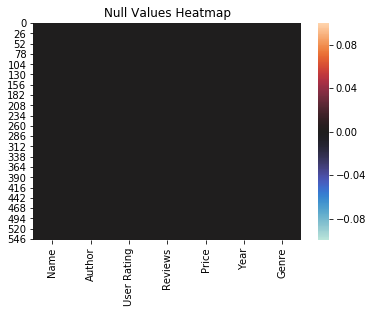

In [50]:
## this is the visual representation of null values present in data
sns.heatmap(Amazon_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

Fortunately, there aren't any missing values in the dataset.

In [7]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
Amazon_df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

## Exploratory Analysis and Visualization 

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques.

In this section will try explore our dataset and find some intresting insights with the help of some different graphs and plots.

### GENRE TYPE : FICTION AND NON-FICTION BESTSELLERS

In [8]:
Amazon_df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

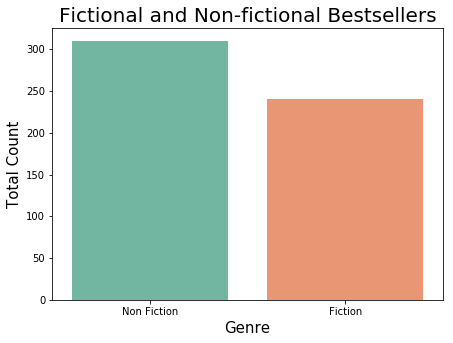

In [52]:
plt.figure(figsize=(7,5))
g = sns.countplot(Amazon_df.Genre, palette='Set2');
plt.title("Fictional and Non-fictional Bestsellers",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Total Count",fontsize=15)
plt.show()

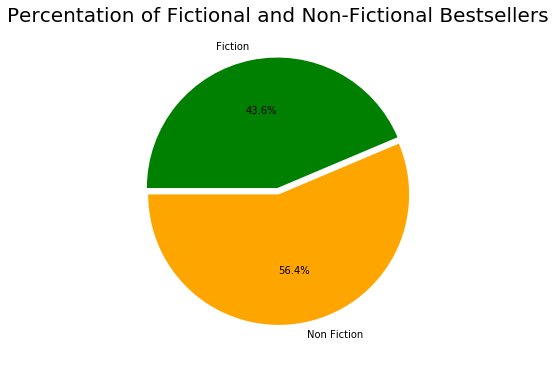

In [9]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Fictional and Non-Fictional Bestsellers",fontsize=20)
g = plt.pie(Amazon_df.Genre.value_counts(),explode=(0.025,0.025),labels=Amazon_df.Genre.value_counts().index, colors=['orange','green'],autopct='%1.1f%%', startangle=180)
plt.show()

##### We can clearly infer that Non-Fiction bestsellers are more than Fiction Bestsellers.

### BESTSELLER'S RATINGS COUNT

In [10]:
Amazon_df['User Rating'].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

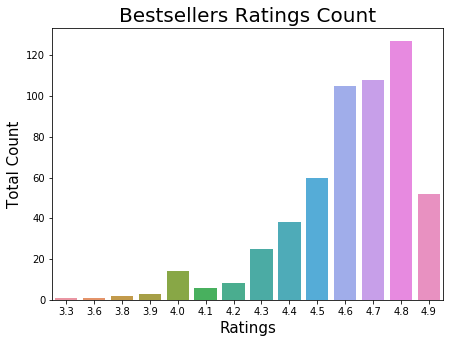

In [11]:
plt.figure(figsize=(7,5))
g = sns.countplot(x=Amazon_df['User Rating']);
plt.title("Bestsellers Ratings Count",fontsize=20)
plt.xlabel("Ratings",fontsize=15)
plt.ylabel("Total Count",fontsize=15)
plt.show()

##### From the plot above we can say that  most of the ratings are in the range of 4.6 to 4.8 

### RATINGS BY GENRE

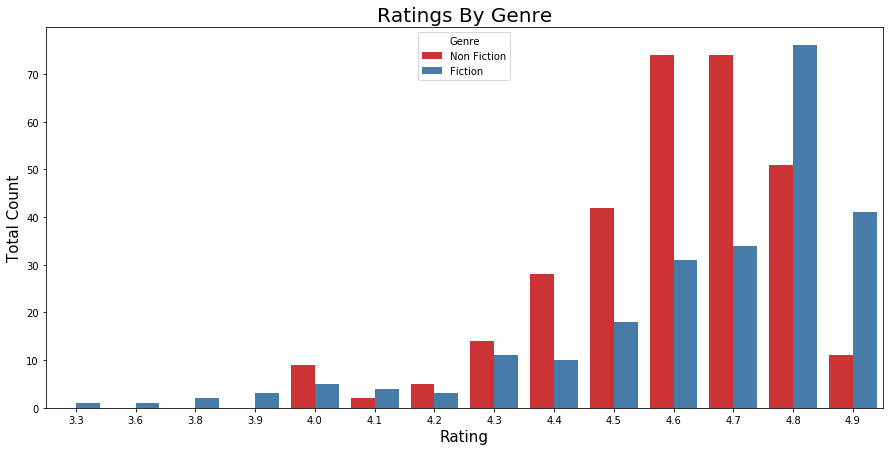

In [30]:
plt.figure(figsize=(15,7))
g = sns.countplot(x=Amazon_df['User Rating'],hue=Amazon_df.Genre, palette ='Set1');
plt.title("Ratings By Genre",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Total Count",fontsize=15)
plt.show()

##### In Above plot there is an important point to note that for ratings less than 4.8, Non-fiction books count overtakes the Fiction book but the reverse can be seen for the ratings of 4.8 and 4.9. however earlier we have seen that Non-fiction books have an overall higer count in the entire dataset.

### NUMBER OF BESTSELLERS OVER THE YEARS 

In [13]:
Amazon_df['Year'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

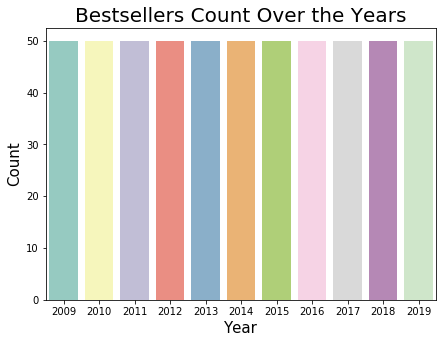

In [14]:
plt.figure(figsize=(7,5))
g = sns.countplot(x=Amazon_df['Year'],palette='Set3');
plt.title("Bestsellers Count Over the Years",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

##### The Number of bestselling books count is constant  for all the years.(i.e 50)

###  GENRE BASED NUMBER OF BESTSELLERS OVER THE YEARS

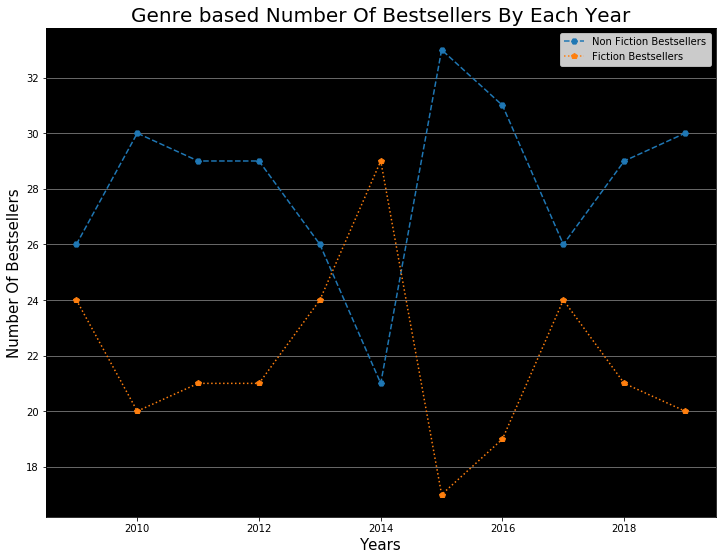

In [22]:
grouped = Amazon_df.groupby('Genre')
years = range(2009,2020)
non_fiction = grouped.get_group(("Non Fiction"))
non_fict = non_fiction.groupby('Year')['Name'].count().values
fiction = grouped.get_group("Fiction")
fict = fiction.groupby('Year')['Name'].count().values
#------------------------------------------------
#Creating a lineplot using values above.

figure, axes = plt.subplots(figsize=(12,9))
ax = plt.axes()
ax.set_facecolor("Black") 
plt.grid(color = 'grey', axis = 'y')
plt.plot(years,non_fict,label='Non Fiction Bestsellers',linestyle='--',marker='H')
plt.plot(years,fict,label='Fiction Bestsellers',linestyle=':',marker='p')
plt.title('Genre based Number Of Bestsellers By Each Year', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number Of Bestsellers',fontsize=15)
plt.legend()
plt.show()

##### Almost in every year the Number of Non-Fiction bestsellers are higher than the Number of  Fictional bestseller which means that Non-Fictional books are more in demand except for the year 2014. we can cleary see that there is Sudden increase in Number of Fiction bestseller and the Number of Non-fictional drastically decreases. 
##### Here question arises that why there is a suddent change in the pattern?
##### There could be various reason for this like it might be possible that the price of non-fictional bestesellers was quite high in year 2014 . will verify this hypothesis as we move further with our analysis.

###  'GENRE' PERFORMANCE AS PER 'USER RATING'

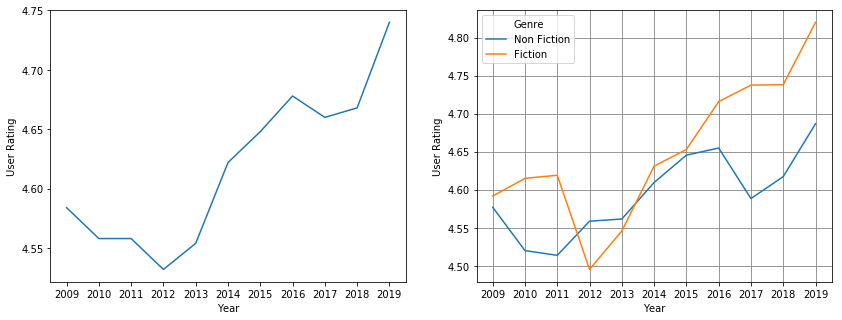

,User Rating,Rating Fiction,Rating Non Fiction
Year,,,
2009,4.584,4.592,4.577
2010,4.558,4.615,4.520
2011,4.558,4.619,4.514
2012,4.532,4.495,4.559
2013,4.554,4.546,4.562
2014,4.622,4.631,4.610
2015,4.648,4.653,4.645
2016,4.678,4.716,4.655
2017,4.660,4.737,4.588


In [37]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = Amazon_df.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', data=Amazon_df, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=Amazon_df['Year'].value_counts(ascending=True).index)


sns.lineplot(x='Year', y='User Rating', hue='Genre', data=Amazon_df, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=Amazon_df['Year'].value_counts(ascending=True).index)

plt.grid(color = 'grey')
plt.show()

time = pd.DataFrame(Amazon_df.groupby('Year')['User Rating'].mean())
time_genre = pd.DataFrame(Amazon_df.groupby(['Genre', 'Year'])['User Rating'].mean())

time['Rating Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['User Rating'], 3))
time['Rating Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['User Rating'], 3))
display(time)

- we see that in general, fiction bestsellers' ratings are higher than those of non-fiction bestsellers. This information is  surprising since the number of non-fiction bestsellers was higher than that of fiction bestsellers.
-  Since 2012, the books have been performing well in terms of average 'User Rating', showing an increasing trend. In 2016, though, the trend had a small decrease of 0.018. Taking a look at the performance per genre, we can see that the small decrease was because of a sloppy performance of Non fiction books that year, decrease from 4.655 to 4.588. However, Non fiction books were slowly able to get back on the track and revert the decreasing trend just in 2017.
- Except from 2012 and 2013, Fiction books have been performing better that Non Fiction books.

### GENRE PERFORMANCE AS PER PRICE

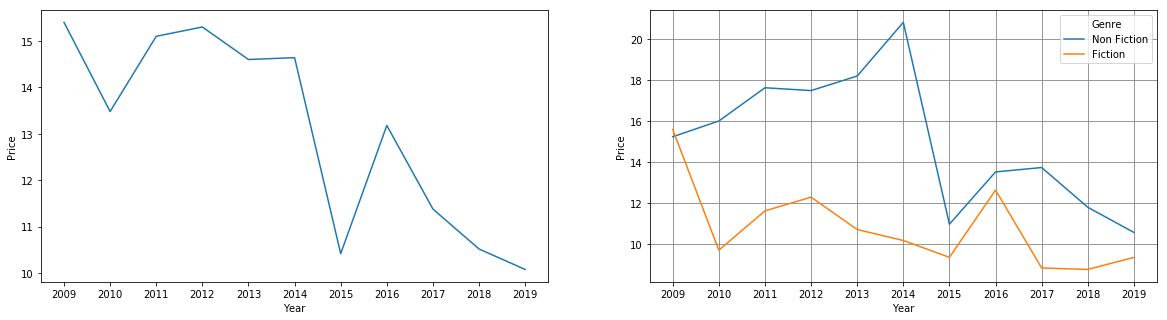

,Price,Price Fiction,Price Non Fiction
Year,,,
2009,15.40,15.583,15.231
2010,13.48,9.700,16.000
2011,15.10,11.619,17.621
2012,15.30,12.286,17.483
2013,14.60,10.708,18.192
2014,14.64,10.172,20.810
2015,10.42,9.353,10.970
2016,13.18,12.632,13.516
2017,11.38,8.833,13.731


In [39]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

price = Amazon_df.groupby('Year')['Price'].mean()
price = price.reset_index()

sns.lineplot(x='Year', y='Price', data=Amazon_df, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=Amazon_df['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='Price', data=Amazon_df, ci=None, markers=True, ax=ax[1], hue='Genre')
ax[1].set_xticks(ticks=Amazon_df['Year'].value_counts(ascending=True).index)

plt.grid(color = 'grey')
plt.show()

time = pd.DataFrame(Amazon_df.groupby('Year')['Price'].mean())
time_genre = pd.DataFrame(Amazon_df.groupby(['Genre', 'Year'])['Price'].mean())

time['Price Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['Price'], 3))
time['Price Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['Price'], 3))
display(time)

- Overall, prices show a decreasing trend, having a drastic decrease in 2015, due to the Non Fiction genre, which has been showing high prices in comparisson to Fiction books prices untils 2015.

- There was an increase in prices in 2016 from both genres. Nevertheless, the trend decreased again in 2017.

##### Important point to note here :
Earlier we have seen that for every year the number of Non-Fiction bestsellers were higher than the Number of Fiction bestseller except for the year 2014 i.e the number of Non-Fiction bestsellers has been drastically decreased which leads the increased sales of Fictional books. We have also made the assumption that the potential reason for this could be related to the price.(i.e High price of Non-Fiction books).
So now we can clearly see that our assumption is right. According to the above plot the Price of Non-Fiction Genre is Comparitevely quite high in year 2014 due to which less number of books were Purchased by the people.

### RELATIONSHIP BETWEEN PRICE AND USER RATING 

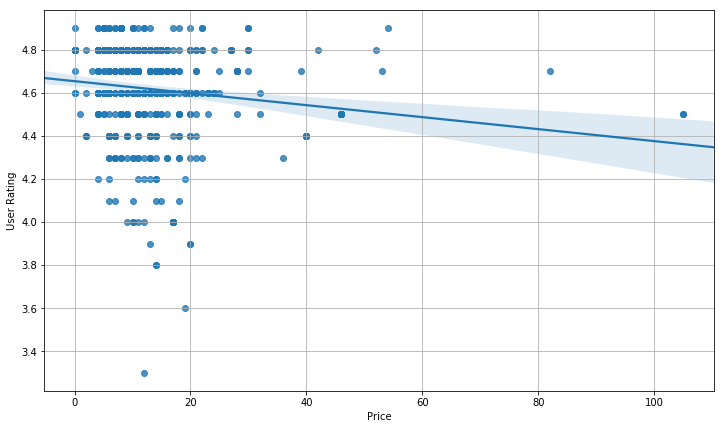

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=Amazon_df, x='Price', y='User Rating', ax=ax)
plt.grid()
plt.show()

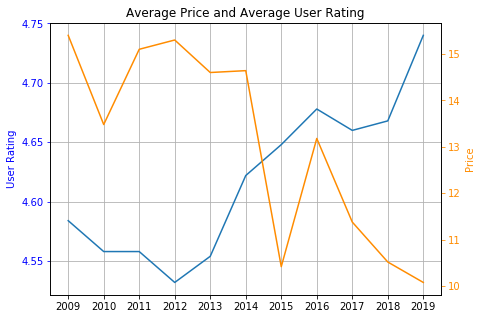

In [54]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Average Price and Average User Rating')

ax.plot(Amazon_df.groupby('Year')['User Rating'].mean())
ax.tick_params('y', colors='blue')
ax.set_ylabel('User Rating', color='blue')
plt.grid()
ax2 = ax.twinx()
ax2.plot(Amazon_df.groupby('Year')['Price'].mean(), color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.set_ylabel('Price', color='darkorange')

ax.set_xticks(ticks=Amazon_df['Year'].value_counts(ascending=True).index)

plt.show()

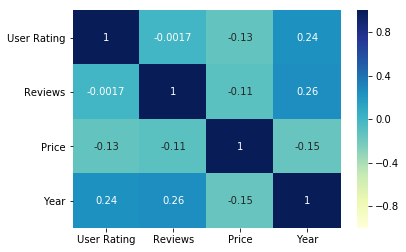

In [56]:
sns.heatmap(Amazon_df.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.show()

##### From the above graphs, we can see that The correlation is not so strong between 'Price' and 'User Rating'. Most of the books are in the 'Less than 50" price range ,so not much conclusion can be drawn.

### BESTSELLING BOOK'S AUTHORS

Text(0.5, 0, 'Author')

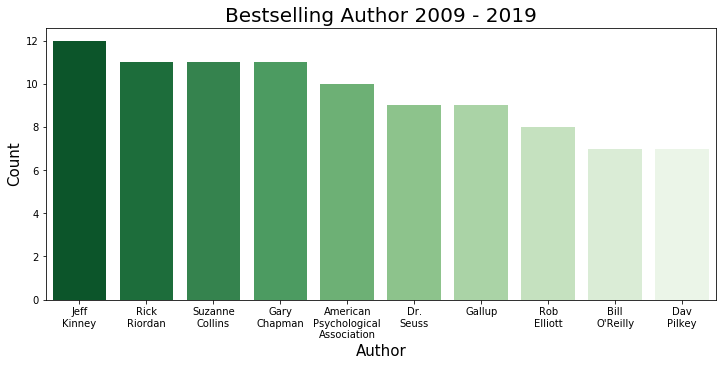

In [14]:

fig, ax = plt.subplots(figsize=(12,5))
books_auth = Amazon_df.copy()
books_auth['Author'] = books_auth['Author'].apply(lambda x: x.replace(" ","\n"))
sns.countplot(data=books_auth, 
              x='Author', 
              palette='Greens_r', 
              order=books_auth['Author'].value_counts().head(10).index)
ax.set_title('Bestselling Author 2009 - 2019',fontsize=20)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlabel('Author',fontsize=15)



###### Most of the Bestselling books are of Jeff Kinney follwed by Rick Riordan, Suzanne Collins and Gray Chapman.

### TOP 10 BESTSELLERS WITH HIGHEST REVIEWS


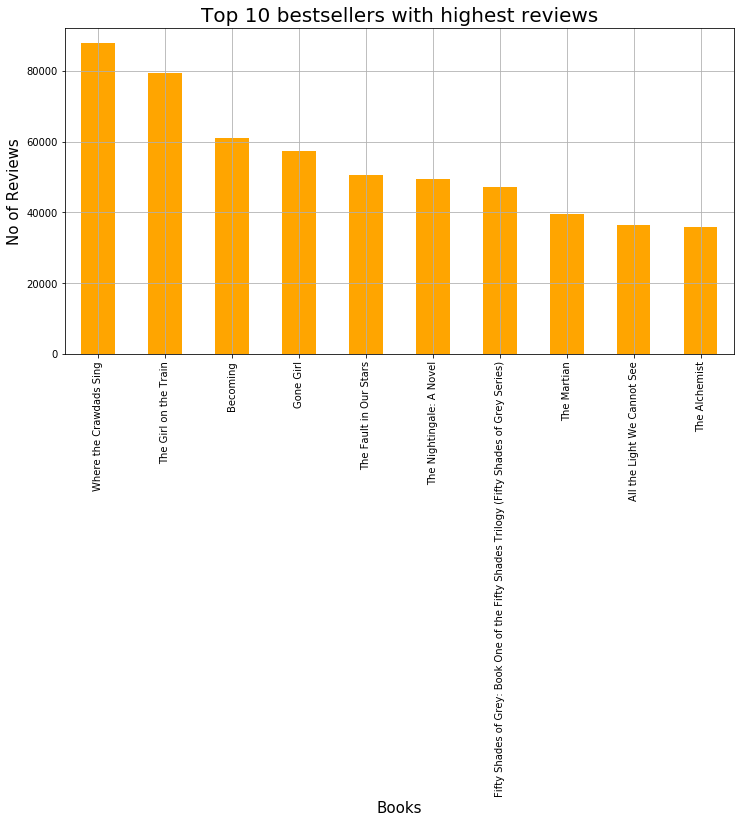

In [31]:
Amazon_df.groupby('Name')['Reviews'].max().sort_values(ascending=False).head(10).plot(kind='bar',color="orange",figsize=(12,6))
plt.xlabel('Books', fontsize=15)
plt.ylabel('No of Reviews', fontsize=15)
plt.title('Top 10 bestsellers with highest reviews',fontsize=20)
plt.grid()

##### Book "where the crawdads sing" got the highest review.

### TOP 10 HIGHEST PRICE BESTSELLERS 
####  Most Expensive Bestseller

Text(0, 0.5, 'Book Title')

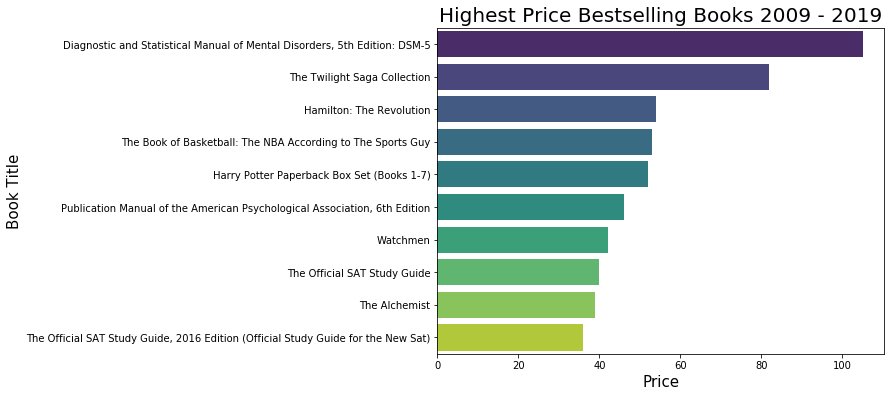

In [10]:
rating = Amazon_df.drop_duplicates(subset='Name').sort_values(by='Price', ascending=False)

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=rating.head(10), x='Price', y='Name', palette='viridis') 
ax.set_title('Highest Price Bestselling Books 2009 - 2019',fontsize=20)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('Book Title',fontsize=15)

##### Diagnostic and statistical Manual of Mental Disorders, 5th Edition is the most expensive bestselller.

### FREE BOOKS WITH THE BEST RATING 

In [49]:
Amazon_df[Amazon_df['Price']==0].sort_values('User Rating', ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction


##### "Little Blue Truck" by Alice Schertle is the most beloved free book with a user rating of 4.9

## Conclusion

In this notebook, we have analysed Amazon's top 50 bestselling books of each year from 2009 to 2019. As a result of this analysis, we found that :

- number of Amazon bestselling non-fiction books is higher than that of fiction books, and even though non-fiction bestselling books were higher most of the times, there is an exception for the year 2014.i.e the number of Non-Fiction bestsellers has been drastically decreased which leads the increased sales of Fictional books as Price of Non-Fiction Genre is Comparitevely quite high in year 2014 due to which less number of books were Purchased by the people.
- most of the ratings are in the range of 4.6 to 4.8 .
- Moreover, in contrast to the fact that there were more non-fiction bestsellers, we saw that fiction books usually had higher ratings than non-fiction books did.
- Number of bestselling books sold every year(2009-2019) was constant.i.e 50.
- Except from 2012 and 2013, Fiction books have been performing better that Non Fiction books as per user ratings.
- The correlation was not so strong between 'Price' and 'User Rating'. Most of the books are in the 'Less than 50" price range.
- Most of the Bestselling books are of Jeff Kinney follwed by Rick Riordan, Suzanne Collins and Gray Chapman.
- Book "where the crawdads sing" got the highest review and the Diagnostic and statistical Manual of Mental Disorders, 5th Edition is the most expensive bestseller.
